## Movie rating accuracy analysis

I'll analyze more movie ratings data to determine whether there was any change in Fandango's rating system after Hickey's analysis.

In [7]:
import pandas as pd

pd.options.display.max_columns=100

In [8]:
prior=pd.read_csv("fandango_score_comparison.csv")
after=pd.read_csv("movie_ratings_16_17.csv")

In [9]:
prior.head()
prior.shape

(146, 22)

In [10]:
after.head()
after.shape

(214, 15)

In [11]:
fandango_prior=prior[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

fandango_after=after[['movie', 'year', 'fandango']].copy()

In [12]:
fandango_prior.shape

(146, 5)

In [13]:
fandango_after.shape

(214, 3)

### Change of Plans

We will tweak the current goal of analysis

we now have two populations that we want to describe and compare with each other:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016

popularity is defined through Hickey's benchmark: a movie is considered "popular" if it had 30 fan ratings or more on Fandango's website at the time the data was collected.

In [14]:
#step 1 : isolate movies released in 2015
fandango_prior[["Title","Year"]]=fandango_prior["FILM"].str.extract(r'(.+)\((\d{4})\)') #year in seperate column
fandango_prior.head()


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Title,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,Do You Believe?,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,Hot Tub Time Machine 2,2015


In [15]:
fandango_prior['Year'].value_counts()

Year
2015    129
2014     17
Name: count, dtype: int64

In [16]:
 #filter the rows where year == "2015"
fandango_2015=fandango_prior[fandango_prior['Year']=="2015"].copy()
fandango_2015['Year'].value_counts()  #confirm 2015 only

Year
2015    129
Name: count, dtype: int64

In [17]:
#step 2 : isolate movies released in 2016
fandango_after['year'].dtype #check type 

dtype('int64')

In [18]:
fandango_after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [19]:
fandango_2016=fandango_after[fandango_after['year']==2016].copy()
fandango_2016['year'].value_counts()

year
2016    191
Name: count, dtype: int64

### Comparing Distribution Shapes for 2015 and 2016

Now a comparison between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016 will be conducted. Analysis and Comparison will be commenced.

First, the shape of the distributions will be examined using kernel density plots.

In [20]:
print(fandango_2016.columns)

Index(['movie', 'year', 'fandango'], dtype='object')


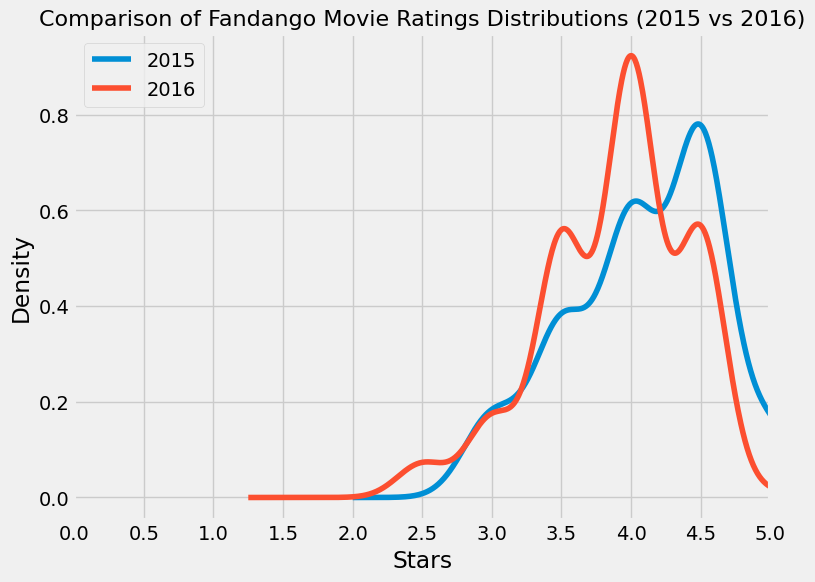

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #extra styling 

#plotting the distribution
fandango_2015["Fandango_Stars"].plot.kde(label="2015", legend=True, figsize=(8,6))
fandango_2016["fandango"].plot.kde(label="2016", legend=True, )

#customize it
plt.title("Comparison of Fandango Movie Ratings Distributions (2015 vs 2016)",fontsize=16)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xlim(0,5) #scale of rating is 0-5
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]) #tick marks at every 0.5 addition


plt.show()

Analysis of the two kernel density plots:
+ Both are left skewed.
+ However, 2016 is slightly shifted to the left.
+ Their differentiation:
    2015 has a stronger peak around 4.5 stars
    Meanwhile, 2016 shifts slightly lower, reaching it's peak around 4.0 stars
+ Both distributions lean toward the higher end of the scale (4-5 stars), meaning most movies receive high ratings. However, movies released in 2016 suggest a more realistic rating pattern, which likely reflects changes in Fandango’s rating practices, as the company improved its accuracy.
+ Overall, this shows that movies rated in 2016 were slightly lower than in 2015.

### Comparing Relative Frequencies

The frequency tables of the two distributions will be examined. Percentages will be used instead, since the dataset contains different number of movies.

In [22]:
print("2015: \n")
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index().mul(100).round(2)

2015: 



Fandango_Stars
3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: proportion, dtype: float64

In [23]:
print("2016: \n")
fandango_2016['fandango'].value_counts(normalize=True).sort_index().mul(100).round(2)

2016: 



fandango
2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: proportion, dtype: float64

High ratings such as 4.5 and 5.0 stars was much lower in percentage in 2016 than in 2015. In 2016, approximately 0.5% of movies were rated a perfect score of 5.0 stars, compared to 7% of movies were rated a perfect score in 2015. Ratings of 4.5 reached almost 38% of movies, making it the most frequent, while only 24% of movies were rated 4.5 in 2016.
Additionally, in 2016, the minimum rating score is 2.5, meanwhile for 2015 it is 3 stars.
Finally, in 2016, a higher proportion of movies received a 3.5 and 4.0 stars in comparison to 2015. While the density plot shows that ratings in 2016 slightly dropped, the percentages reveal that relatively high ratings such as 3.5 and 4.0 became more common. This indicates a shift from very high ratings to lower positive ratings.

### Determining the Direction of the Change

In [24]:
print("Simple Statistics for 2015:\n")
mean_2015=fandango_2015['Fandango_Stars'].mean().round(2)
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
print("Mean:",mean_2015)
print("Median:",median_2015)
print("Mode:",mode_2015)

Simple Statistics for 2015:

Mean: 4.09
Median: 4.0
Mode: 4.5


In [25]:
print("Simple Statistics for 2016: \n")
mean_2016 = fandango_2016['fandango'].mean().round(2)
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]
print("Mean:",mean_2016)
print("Median:",median_2016)
print("Mode:",mode_2016)

Simple Statistics for 2016: 

Mean: 3.89
Median: 4.0
Mode: 4.0


In [26]:
#SUMMARY in a table
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


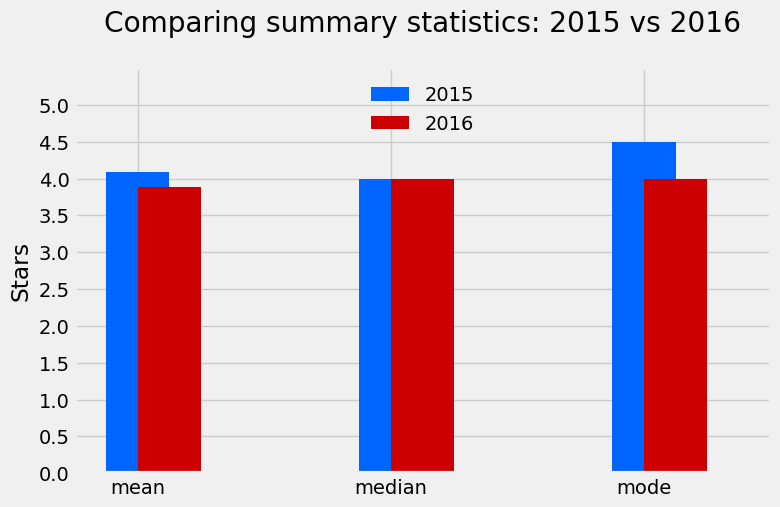

In [27]:
import numpy as np

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()


**Interpretation:**
+ The mean dropped by 0.20 stars, which is a small yet noticeable difference
+ The mode also shifted from 4.5 to 4.0, reinforcing the idea of slightly lower ratings.
+ The median stayed the same, suggesting the center of the distribution is unchanged.


### Conclusions

In conclusion, this confirms what we observed before in the kernel density plot. Overall, popular movies released in 2016 received slightly lower ratings than those released in 2015. While the exact cause is not exact, it is most likely that the change resulted from Fandango improving his biased rating system after Hickey's investigation. 